In [4]:
# load libraries 
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

In [5]:
# set seeds
torch.manual_seed(2020)
np.random.seed(2020)

In [15]:
# load data
train = np.loadtxt("ECG200_TRAIN.txt")
test  = np.loadtxt("ECG200_TEST.txt")

# the first column is label
X_train = train[:, 1:]       
y_train = train[:, 0].astype(int)     
X_test  = test[:, 1:]              
y_test  = test[:, 0].astype(int)

# original label is -1, +1, we convert to 0, 1 for BCE
y_train = (y_train == 1).astype(np.float32)
y_test  = (y_test == 1).astype(np.float32)


# convert to torch tensor
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  # (N,1)
X_test  = torch.tensor(X_test, dtype=torch.float32)
y_test  = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


print("X_train:", X_train.shape, "y_train:", y_train.shape)

X_train: torch.Size([100, 96]) y_train: torch.Size([100, 1])


In [16]:
# define model of logistic regression

class LogisticECG(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(96, 1) 

    def forward(self, x):
        logits = self.linear(x)
        prob = torch.sigmoid(logits)        
        return prob                       


model = LogisticECG()

In [18]:
# model training

loss_function = nn.BCELoss()                       
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Full-batch 
num_epochs = 200
loss_history = []

for epoch in range(num_epochs):
    model.train()

    optimizer.zero_grad()
    y_prob = model(X_train)                
    loss = loss_function(y_prob, y_train)       
    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

    if epoch % 20 == 0:
        print(f"Epoch {epoch:3d} | Loss = {loss.item():.4f}")

Epoch   0 | Loss = 0.1442
Epoch  20 | Loss = 0.1225
Epoch  40 | Loss = 0.1049
Epoch  60 | Loss = 0.0903
Epoch  80 | Loss = 0.0782
Epoch 100 | Loss = 0.0682
Epoch 120 | Loss = 0.0599
Epoch 140 | Loss = 0.0530
Epoch 160 | Loss = 0.0471
Epoch 180 | Loss = 0.0421


In [19]:
# evaluete
model.eval()
with torch.no_grad():
    test_prob = model(X_test)        
    test_pred = (test_prob >= 0.5).float()
    acc = (test_pred == y_test).float().mean().item()

print("Test Accuracy:", round(acc, 3))

Test Accuracy: 0.82


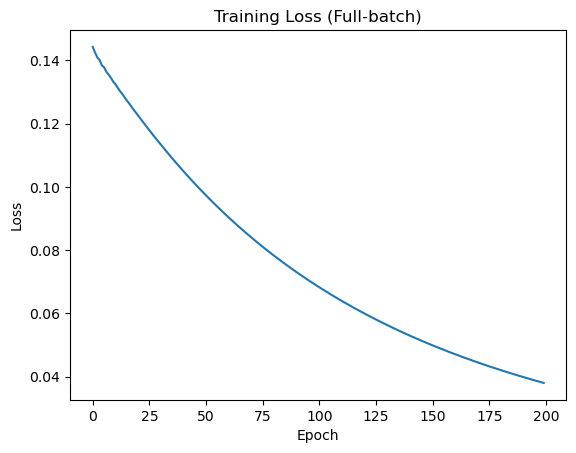

In [20]:
# plot
plt.plot(loss_history)
plt.title("Training Loss (Full-batch)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()